**Question 01**

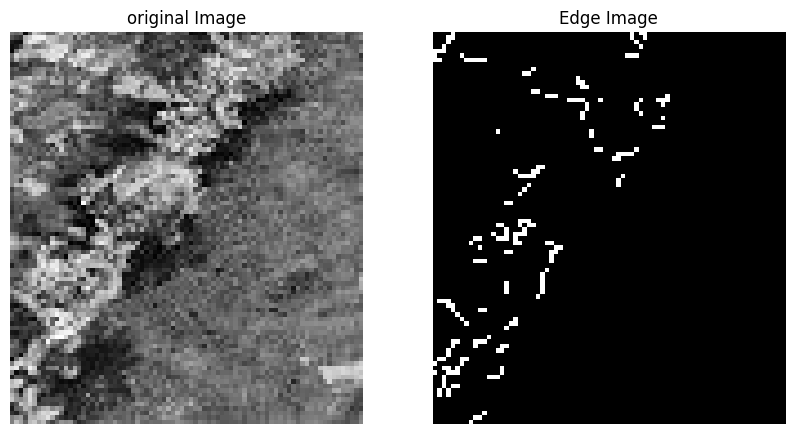

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("original Image")
ax[0].axis('off')
ax[1].imshow(edges.astype('uint8'), cmap='gray')
ax[1].set_title("Edge Image")
ax[1].axis('off')

plt.show()


**Question 02**

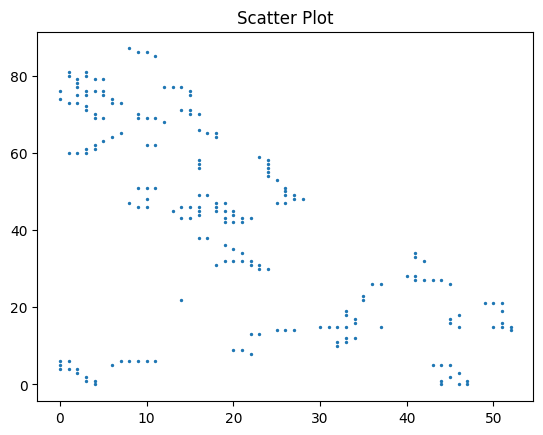

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


plt.scatter(x, y,s=2)
plt.title('Scatter Plot')
plt.show()

**Question 03**

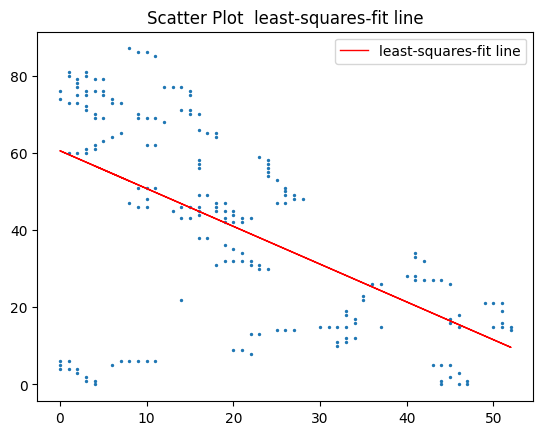

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


m,c = np.polyfit(x, y, 1)
y_ = m*x + c

plt.scatter(x, y,s=2)
plt.title('Scatter Plot  least-squares-fit line')
plt.plot(x, y_, color='r', linewidth=1, label=r'least-squares-fit line')
plt.legend(loc='best')
plt.show()


**Question 04**


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


m,c = np.polyfit(x, y, 1)
y_ = m*x + c

slope = np.arctan(m)*180/np.pi
print("Estimated value of the crop field angle:", slope, "degrees")

Estimated value of the crop field angle: -44.38702510610566 degrees


**Question 06**


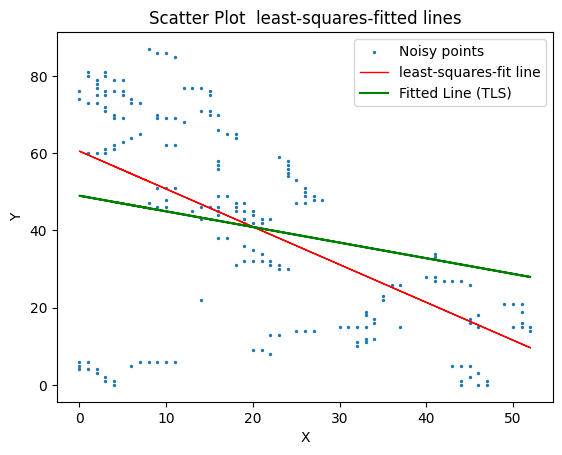

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

m,c = np.polyfit(x, y, 1)
y_ = m*x + c

# Construct the data matrix
B = np.vstack([x, y]).T

# Calculate the centroid of the data points
centroid = np.mean(B, axis=0)

# Center the data points around the centroid
centered_data = B - centroid

# Perform Singular Value Decomposition (SVD) on the centered data
U, S, Vt = np.linalg.svd(centered_data, full_matrices=False)

# Compute the slope and intercept for the total least squares fit line
m_t = -Vt[0, 0] / Vt[1, 0]
c_t = centroid[1] - m_t * centroid[0]

# Calculate the y values for the total least squares fit line
y_t = m_t * x + c_t


plt.scatter(x, y, s=2, label='Noisy points')
plt.title('Scatter Plot  least-squares-fitted lines')
plt.plot(x, y_, color='r', linewidth=1, label=r'least-squares-fit line')
plt.plot(x, y_t, c='g', label='Fitted Line (TLS)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Question 07** 

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]


# Construct the data matrix
B = np.vstack([x, y]).T

# Calculate the centroid of the data points
centroid = np.mean(B, axis=0)

# Center the data points around the centroid
centered_data = B - centroid

# Perform Singular Value Decomposition (SVD) on the centered data
U, S, Vt = np.linalg.svd(centered_data, full_matrices=False)

# Compute the slope and intercept for the total least squares fit line
m_t = -Vt[0, 0] / Vt[1, 0]
c_t = centroid[1] - m_t * centroid[0]

# Calculate the y values for the total least squares fit line
y_t = m_t * x + c_t

#calculate the slope of the total least squares fit line

slope = np.arctan(m_t)*180/np.pi
print("Estimated value of the the crop field angle based on the total least-squares-fit:", slope, "degrees")

Estimated value of the the crop field angle based on the total least-squares-fit: -22.026565186321758 degrees


**Question 10**

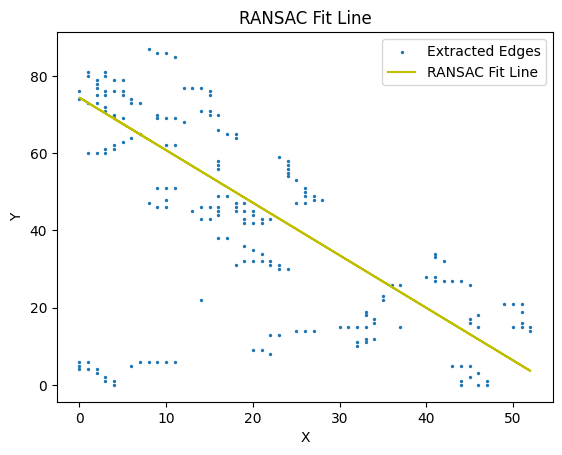

In [1]:
from sklearn.linear_model import RANSACRegressor
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

# Initialize RANSAC model
ransac = RANSACRegressor()

# Fit RANSAC model
ransac.fit(x.reshape(-1, 1), y)

# Extract slope and intercept
m_ransac = ransac.estimator_.coef_[0]
c_ransac = ransac.estimator_.intercept_

# Calculate y values for the RANSAC fit line
y_ransac = m_ransac * x + c_ransac

# Plot scatter plot and RANSAC fit line
plt.scatter(x, y, s=2, label='Extracted Edges')
plt.plot(x, y_ransac, color='y', label='RANSAC Fit Line')
plt.title('RANSAC Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

**Question 11**

In [1]:
from sklearn.linear_model import RANSACRegressor
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)


edges = cv.Canny(img, 550 , 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

# Initialize RANSAC model
ransac = RANSACRegressor()

# Fit RANSAC model
ransac.fit(x.reshape(-1, 1), y)

# Extract slope of the fitted line
slope = ransac.estimator_.coef_[0]

# Calculate angle from slope (assuming y-axis is pointing downwards)
angle_deg = np.degrees(np.arctan(slope))

print("Estimated angle of the crop field: {:.2f} degrees".format(angle_deg))

Estimated angle of the crop field: -53.77 degrees
